# Regression Model Evaluation

When evaluating regression models, we often wish to measure how closely the model’s predictions $ \hat{y} $ match the true values $ y $. Several key metrics are used for this purpose, and they can be defined mathematically as follows:

## 1. Mean Squared Error (MSE)

The MSE is defined as the average of the squared differences between the predicted and true values:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Interpretation:**  
  MSE penalizes larger errors more significantly because the errors are squared. A lower MSE indicates a model with predictions that are closer to the actual values.

## 2. Root Mean Squared Error (RMSE)

The RMSE is simply the square root of the MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- **Interpretation:**  
  RMSE is in the same units as the target variable, making it easier to interpret. It is sensitive to outliers due to the squaring of errors.

## 3. Mean Absolute Error (MAE)

The MAE measures the average magnitude of the errors without considering their direction:

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- **Interpretation:**  
  MAE gives a linear score, which means that all individual differences are weighted equally in the average. It is less sensitive to outliers compared to MSE/RMSE.

## 4. Coefficient of Determination ($ R^2 $ Score)

The $ R^2 $ score represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s):

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where $ \bar{y} $ is the mean of the observed data.

- **Interpretation:**  
  - $ R^2 = 1 $: Perfect prediction.  
  - $ R^2 = 0 $: Model does no better than the mean of the data.  
  - $ R^2 < 0 $: The model is performing worse than simply using the mean.


# Classifier evaluation  



| Actual \\ Predicted | Positive (Predicted) | Negative (Predicted) |
|--------------------|---------------------|---------------------|
| **Positive (Actual)**  | True Positive (TP)  | False Negative (FN)  |
| **Negative (Actual)**  | False Positive (FP)  | True Negative (TN)  |


## 1. **Accuracy**  
**Concept:** Measures the proportion of correctly classified instances out of all instances.  

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$  


**Example:** A credit scoring model classifies loans as “good” or “bad.” If 95 out of 100 loans are correctly classified, accuracy is 95%. However, if only 5% of loans are actually “bad,” a model always predicting “good” would also achieve 95% accuracy—highlighting its limitations with imbalanced data.  





## 2. **Precision**  
**Concept:** Measures how many of the predicted positive cases are actually positive.  


$$
\text{Precision} = \frac{TP}{TP + FP}
$$  

**Example:** In fraud detection, if a system flags 100 transactions as fraudulent but only 60 are actually fraudulent, precision is 60%. A high precision ensures that flagged transactions are likely real fraud cases, reducing false alarms that waste resources and frustrate customers.  





## 3. **Recall (Sensitivity)**  
**Concept:** Measures the proportion of actual positive cases that are correctly identified by the model.  


$$
\text{Recall} = \frac{TP}{TP + FN}
$$  

**Example:** In medical diagnostics, missing a true case of a disease can be critical. If a model detects 80 out of 100 actual cases, recall is 80%. High recall ensures most positive cases are captured, even at the cost of some false positives. In finance, high recall in default detection helps ensure risky loans are identified.  





## 4. **F1 Score**  
**Concept:** The harmonic mean of precision and recall, ensuring a balance between them.  


$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  

**Example:** A spam filter needs both high precision (to avoid misclassifying legitimate emails) and high recall (to catch most spam). The F1 score ensures neither metric dominates. Similarly, in fraud detection, a good balance prevents missing fraud cases while minimizing unnecessary customer disruptions.  



---

## 5. **ROC Curve & AUC**  
**Concept:**  
- The **ROC Curve** plots the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR).  
- **AUC (Area Under the Curve)** measures the model’s ability to distinguish between classes.  

**Mathematical Definitions:**  
- **True Positive Rate (Recall):**  
  $$
  TPR = \frac{TP}{TP + FN}
  $$  
- **False Positive Rate:**  
  $$
  FPR = \frac{FP}{FP + TN}
  $$  

**Example:** In credit risk assessment, adjusting the threshold for labeling loans as risky affects the balance between correctly identified defaulters (TPR) and incorrectly flagged non-defaulters (FPR). A high AUC indicates strong performance in distinguishing between risky and non-risky loans.  





# Cross Validation(Not for Time Series!)

---





Cross validation estimates a model’s generalization ability by partitioning the dataset into multiple subsets (folds) for repeated training and evaluation.  

Given a dataset:  
$$ D = \{(x_i, y_i)\}_{i=1}^{n} $$  
where $ n $ is the number of samples, cross validation splits $ D $ into $ k $ disjoint folds:  
$$ D = D_1 \cup D_2 \cup \cdots \cup D_k, \quad D_i \cap D_j = \emptyset \quad \text{for } i \neq j. $$  
For each fold $ i $:  
- Train on $ D_{\text{train}}^{(i)} = D \setminus D_i $  
- Validate on $ D_i $  

The overall error estimate is:  
$$ \bar{E} = \frac{1}{k} \sum_{i=1}^{k} E_i. $$  

---

**Benefits**  

1. **Generalization Estimation** – Reliable performance estimation across multiple folds.  
2. **Overfitting Detection** – Detects variance in model performance.  
3. **Efficient Data Usage** – Every sample is used for training and validation.  
4. **Model Selection** – Provides stable evaluation for hyperparameters and algorithms.  



## **K-Fold Cross Validation**  

Splits data into $ k $ subsets and iteratively trains on $ k-1 $ folds while validating on the remaining fold.  

- Train on:  
  $$ D_{\text{train}}^{(i)} = D \setminus D_i $$  
- Compute validation error $ E_i $ on $ D_i $.  
- Final evaluation:  
  $$ \bar{E} = \frac{1}{k} \sum_{i=1}^{k} E_i. $$  

**Accuracy Formula:**  
$$ \text{Accuracy}_{\text{CV}} = \frac{1}{k} \sum_{i=1}^{k} \frac{\text{Correct Predictions in } D_i}{\text{Total Samples in } D_i}. $$  


## **Stratified K-Fold Cross Validation**  

Ensures each fold maintains class distribution, crucial for imbalanced datasets.  

If class proportions are:  
$$ p_{\text{positive}}, \quad p_{\text{negative}} = 1 - p_{\text{positive}}, $$  
each fold $ D_i $ satisfies:  
$$ \frac{n_{j,i}}{|D_i|} \approx \frac{n_j}{n}, $$  
where $ n_{j,i} $ is the count of class $ j $ in fold $ i $.  

**Advantages:**  
- **Reduced Variance** – More stable performance estimation.  
- **Fair Comparison** – Preserves class ratios, ensuring reliable metric calculations.  


# Cross Validation for Time series

## **Purged k-Fold Cross Validation**  


In time series modeling, adjacent observations are correlated. Standard k-fold cross validation can introduce information leakage if training and test splits are too close in time. **Purged k-Fold Cross Validation** mitigates this by removing a **purge window** around the test set, preventing temporal proximity from biasing performance estimates.  



- **Dataset:** Given a time series dataset:  
  $$ D = \{(x_t, y_t)\}_{t=1}^{T} $$  
  where $ T $ is the total number of time steps.  

- **Test Set for Fold $ i $:**  
  $$ \mathcal{T}_i \subset \{1, 2, \dots, T\}. $$  

- **Purge Window:** A set of indices excluded from training, defined as:  
  $$ P_i = \{ t : t \in [t_{\min}(\mathcal{T}_i)-\delta, t_{\min}(\mathcal{T}_i)) \cup (t_{\max}(\mathcal{T}_i), t_{\max}(\mathcal{T}_i)+\delta] \}. $$  
  Here, $ \delta $ is the purge window size, and $ t_{\min}(\mathcal{T}_i) $, $ t_{\max}(\mathcal{T}_i) $ are the time indices of the test set.  

---

### **Training and Validation Sets**  

For each fold $ i $:  

- **Validation Set:**  
  $$ D_{\text{val}}^{(i)} = \{(x_t, y_t) : t \in \mathcal{T}_i \}. $$  

- **Purged Training Set:**  
  $$ D_{\text{train}}^{(i)} = D \setminus (\mathcal{T}_i \cup P_i). $$  

This ensures training data does not include temporally proximate observations.  

---

### **Performance Estimation**  

The model $ f(\cdot; \theta) $ is trained on $ D_{\text{train}}^{(i)} $ and evaluated on $ D_{\text{val}}^{(i)} $, yielding error:  
$$ E^{(i)}(\theta) = \text{Error}\Big( f(\cdot; \theta) \text{ trained on } D_{\text{train}}^{(i)},\, D_{\text{val}}^{(i)} \Big). $$  
The overall cross validation estimate is:  
$$ E(\theta) = \frac{1}{k} \sum_{i=1}^{k} E^{(i)}(\theta). $$  



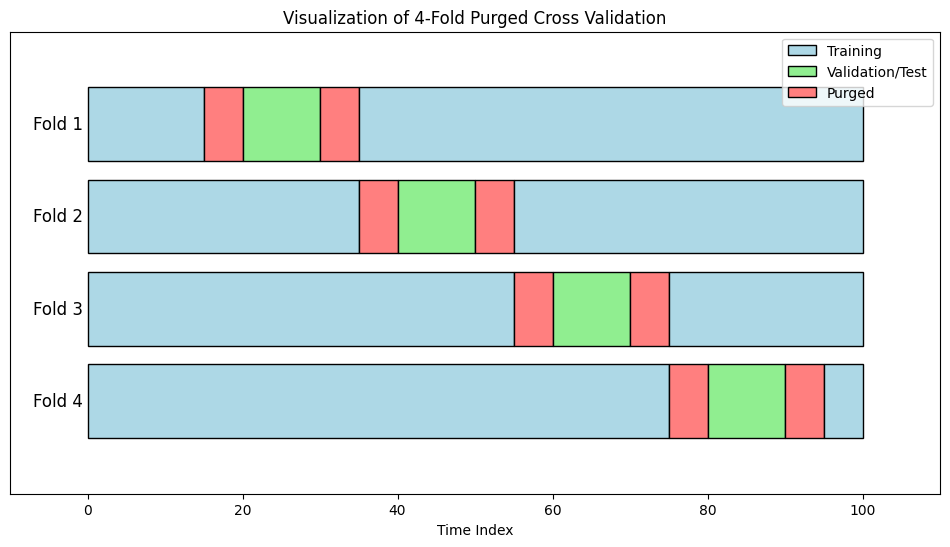

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))
timeline_length = 100  # e.g., time indices from 0 to 100


folds = [
    {'fold': 1, 'test': (20, 10), 'purge_before': (15, 5), 'purge_after': (30, 5)},
    {'fold': 2, 'test': (40, 10), 'purge_before': (35, 5), 'purge_after': (50, 5)},
    {'fold': 3, 'test': (60, 10), 'purge_before': (55, 5), 'purge_after': (70, 5)},
    {'fold': 4, 'test': (80, 10), 'purge_before': (75, 5), 'purge_after': (90, 5)}
]

# Define colors for different segments
color_train = '#ADD8E6'  # light blue for training
color_test  = '#90EE90'  # light green for validation/test
color_purge = '#FF7F7F'  # light red for purged areas

# Define y positions for each fold's bar
y_positions = [3, 2, 1, 0]

for idx, fold in enumerate(folds):
    y = y_positions[idx]
    # Unpack segment definitions
    purge_before_start, purge_before_width = fold['purge_before']
    test_start, test_width = fold['test']
    purge_after_start, purge_after_width = fold['purge_after']

    # Training segment 1: from 0 to start of purge before
    rect_train1 = patches.Rectangle((0, y-0.4), purge_before_start, 0.8,
                                    facecolor=color_train, edgecolor='black')
    ax.add_patch(rect_train1)

    # Purge before: from purge_before_start to test_start
    rect_purge1 = patches.Rectangle((purge_before_start, y-0.4),
                                    test_start - purge_before_start, 0.8,
                                    facecolor=color_purge, edgecolor='black')
    ax.add_patch(rect_purge1)

    # Test (Validation) segment: from test_start to test_start + test_width
    rect_test = patches.Rectangle((test_start, y-0.4), test_width, 0.8,
                                  facecolor=color_test, edgecolor='black')
    ax.add_patch(rect_test)

    # Purge after: from purge_after_start to purge_after_start + purge_after_width
    rect_purge2 = patches.Rectangle((purge_after_start, y-0.4), purge_after_width, 0.8,
                                    facecolor=color_purge, edgecolor='black')
    ax.add_patch(rect_purge2)

    # Training segment 2: from end of purge after to timeline end
    rect_train2 = patches.Rectangle((purge_after_start + purge_after_width, y-0.4),
                                    timeline_length - (purge_after_start + purge_after_width), 0.8,
                                    facecolor=color_train, edgecolor='black')
    ax.add_patch(rect_train2)

    # Annotate the fold number on the left side of the bar
    ax.text(-7, y, f'Fold {fold["fold"]}', verticalalignment='center', fontsize=12)

# Set axis limits and labels
ax.set_xlim(-10, timeline_length + 10)
ax.set_ylim(-1, 4)
ax.set_xlabel('Time Index')
ax.set_yticks([])  # Hide y-axis labels
ax.set_title('Visualization of 4-Fold Purged Cross Validation')

# Create a custom legend
legend_elements = [
    patches.Patch(facecolor=color_train, edgecolor='black', label='Training'),
    patches.Patch(facecolor=color_test,  edgecolor='black', label='Validation/Test'),
    patches.Patch(facecolor=color_purge, edgecolor='black', label='Purged')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def purged_kfold_indices(n_samples, n_splits=5, purge_size=0):
    """
    Generate train-test indices for Purged k-Fold Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_splits (int): Number of folds.
    - purge_size (int): Number of samples to exclude before and after the test set.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    kf = KFold(n_splits=n_splits, shuffle=False)
    indices = np.arange(n_samples)

    folds = []
    for train_idx, test_idx in kf.split(indices):
        test_start, test_end = test_idx[0], test_idx[-1]

        # Define the purge window
        purge_start = max(0, test_start - purge_size)
        purge_end = min(n_samples, test_end + purge_size + 1)

        # Remove purged indices from training set
        train_idx = np.setdiff1d(train_idx, np.arange(purge_start, purge_end))

        folds.append((train_idx, test_idx))

    return folds

# Example usage
n_samples = 100
n_splits = 5
purge_size = 2
folds = purged_kfold_indices(n_samples, n_splits, purge_size)

for i, (train_idx, test_idx) in enumerate(folds):
    print(f"Fold {i+1}:")
    print(f"Train indices: {train_idx}")
    print(f"Test indices: {test_idx}\n")


Fold 1:
Train indices: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98 99]
Test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

Fold 2:
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

Fold 3:
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 

Fold 1 - RMSE: 0.0337
Fold 2 - RMSE: 0.0286
Fold 3 - RMSE: 0.0084
Fold 4 - RMSE: 0.0077
Fold 5 - RMSE: 0.0052
Fold 6 - RMSE: 0.0046
Fold 7 - RMSE: 0.0053
Fold 8 - RMSE: 0.0054
Fold 9 - RMSE: 0.0041
Fold 10 - RMSE: 0.0040


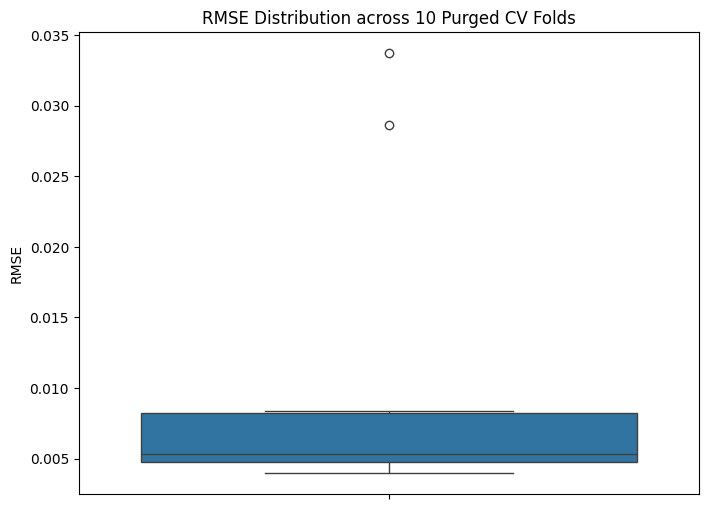

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal',
                    'Return', 'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3']

X = appl[selected_columns].values
y = appl['Tomorrow_Return'].values


n_samples = X.shape[0]


purge_size = 10


folds = purged_kfold_indices(n_samples, n_splits=10, purge_size=purge_size)


rmse_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Fit the model
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute the RMSE for the fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")



plt.figure(figsize=(8, 6))
sns.boxplot(data=rmse_scores)
plt.ylabel('RMSE')
plt.title('RMSE Distribution across 10 Purged CV Folds')
plt.show()


## **Combinatorial Purged Cross-Validation (CPCV)**



- **Dataset Partitioning:**  
  Given $ T $ observations:  
  $$ D = \{(x_t, y_t)\}_{t=1}^{T} $$  
  Partition into $ N $ contiguous groups:  
  $$ \mathcal{G}_1, \mathcal{G}_2, \dots, \mathcal{G}_N, $$  
  ensuring:  
  $$ \bigcup_{i=1}^{N} \mathcal{G}_i = \{1, 2, \dots, T\}, \quad \mathcal{G}_i \cap \mathcal{G}_j = \emptyset \text{ for } i \neq j. $$  

- **Combinatorial Selection of Test Sets:**  
  Instead of a single test fold, CPCV considers **all** $ k $-group test selections:  
  $$ \binom{N}{k} = \frac{N!}{k!(N-k)!}. $$  
  Remaining $ N-k $ groups form an initial training set.  

- **Purging to Prevent Leakage:**  
  Define **purge window** $ \mathcal{P}_i $ for test set $ \mathcal{T}_i $:  
  $$ \mathcal{D}_{\text{train}}^{(i)} = \left( \bigcup_{j=1}^{N} \mathcal{G}_j \setminus \mathcal{T}_i \right) \setminus \mathcal{P}_i. $$  
  This removes training points near test indices to **avoid overlap and leakage**.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
from sklearn.model_selection import KFold

def combinatorial_purged_cv_indices(n_samples, n_partitions=8, k=2, purge_size=20):
    """
    Generate train-test indices for Combinatorial Purged Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_partitions (int): Number of contiguous partitions to split the data into.
    - k (int): Number of partitions to select for the test set.
    - purge_size (int): Number of samples to exclude before and after each test partition.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    # 1. Partition the data contiguously
    partition_size = n_samples // n_partitions
    remainder = n_samples % n_partitions
    partition_boundaries = []
    start_idx = 0
    for i in range(n_partitions):
        size = partition_size + (1 if i < remainder else 0)
        end_idx = start_idx + size
        partition_boundaries.append((start_idx, end_idx))
        start_idx = end_idx

    # 2. Generate all combinations of partitions of size k for the test set
    partition_indices = range(n_partitions)
    test_combos = list(combinations(partition_indices, k))

    folds = []
    all_indices = np.arange(n_samples)
    for combo in test_combos:
        # Build test indices from the selected partitions
        test_indices_list = []
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            test_indices_list.append(np.arange(start, end))
        test_indices = np.concatenate(test_indices_list)

        # Start with all indices; remove test indices
        train_mask = np.ones(n_samples, dtype=bool)
        train_mask[test_indices] = False

        # 3. Purge a window before and after each test partition
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            purge_start = max(0, start - purge_size)
            purge_end = min(n_samples, end + purge_size)
            train_mask[purge_start:purge_end] = False

        train_idx = np.where(train_mask)[0]
        folds.append((train_idx, test_indices))

    return folds


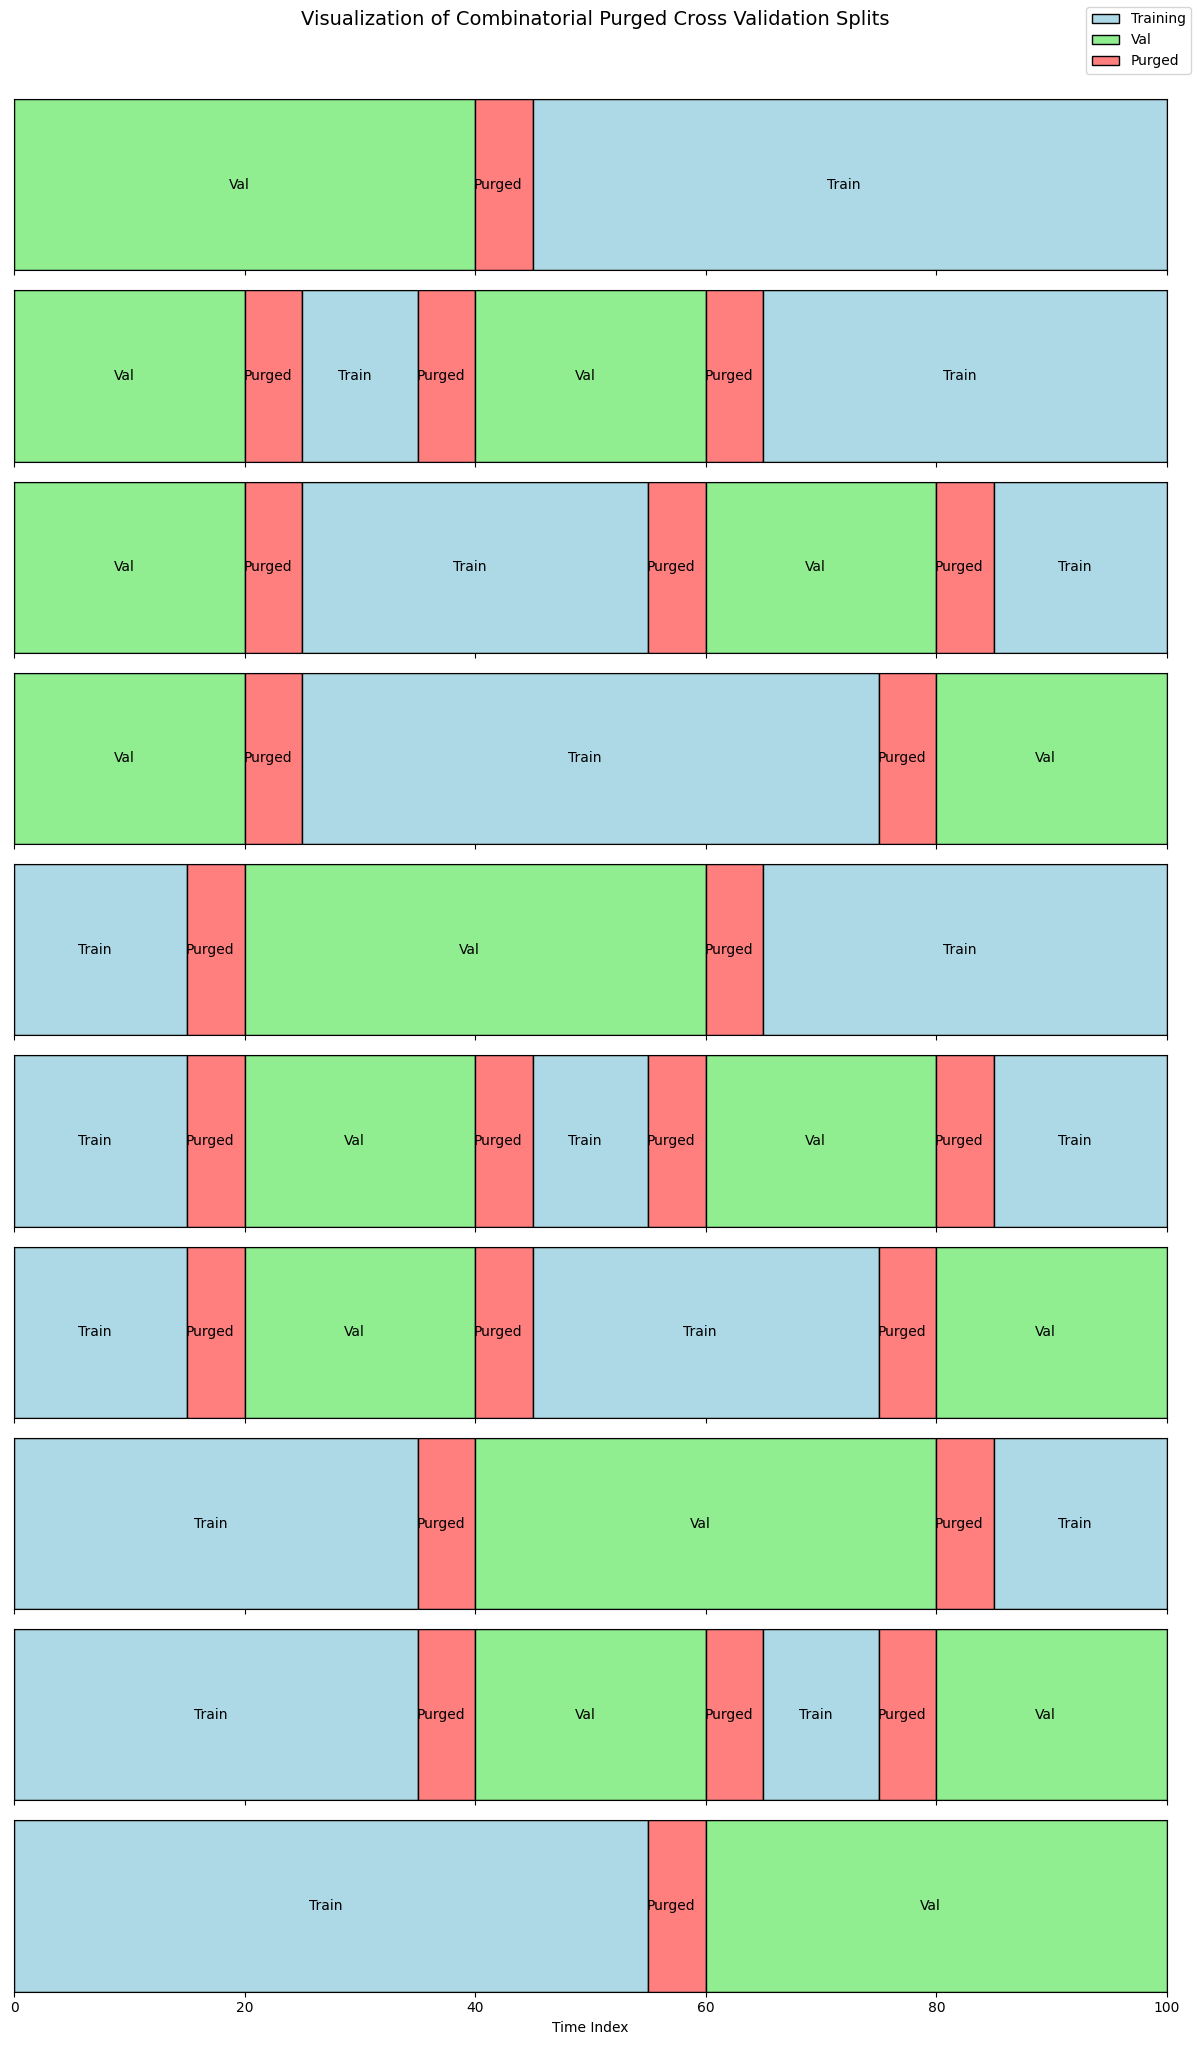

In [ ]:

n_samples = 100
n_partitions = 5
k = 2
purge_size = 5

folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)

n_plots = len(folds)


color_map = {'Train': '#ADD8E6', 'Val': '#90EE90', 'Purged': '#FF7F7F'}

fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2*n_plots), sharex=True)

if n_plots == 1:
    axes = [axes]  # Ensure axes is iterable

for i in range(n_plots):
    train_idx, test_idx = folds[i]
    all_idx = np.arange(n_samples)

    purge_idx = sorted(list(set(all_idx) - set(train_idx) - set(test_idx)))

    # Create a category array for each time index: 'Train', 'Test', or 'Purged'
    categories = np.empty(n_samples, dtype=object)
    for j in range(n_samples):
        if j in train_idx:
            categories[j] = 'Train'
        elif j in test_idx:
            categories[j] = 'Val'
        else:
            categories[j] = 'Purged'

    segments = []
    current_cat = categories[0]
    start = 0
    for j in range(1, n_samples):
        if categories[j] != current_cat:
            segments.append((start, j-1, current_cat))
            current_cat = categories[j]
            start = j
    segments.append((start, n_samples-1, current_cat))

    ax = axes[i]
    # Plot each segment as a rectangle
    for seg in segments:
        s, e, cat = seg
        ax.add_patch(patches.Rectangle((s, 0), e-s+1, 1, facecolor=color_map[cat], edgecolor='black'))
        ax.text((s+e)/2, 0.5, cat, ha='center', va='center', fontsize=10, color='black')
    ax.set_xlim(0, n_samples)
    ax.set_ylim(0, 1)
    ax.set_yticks([])


# Common X label and overall title
axes[-1].set_xlabel('Time Index')
fig.suptitle('Visualization of Combinatorial Purged Cross Validation Splits', fontsize=14, y=1.02)

# Custom legend
legend_elements = [
    patches.Patch(facecolor=color_map['Train'], edgecolor='black', label='Training'),
    patches.Patch(facecolor=color_map['Val'], edgecolor='black', label='Val'),
    patches.Patch(facecolor=color_map['Purged'], edgecolor='black', label='Purged')
]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()